# Spectral Graph Wavelets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting, utils

In [2]:
G = graphs.Bunny()

## Simple filtering: heat diffusion

In [5]:
taus = [10, 25, 50]
g = filters.Heat(G, taus)

In [6]:
s = np.zeros(G.N)
DELTA = 20
s[DELTA] = 1

In [7]:
s = g.filter(s, method='chebyshev')

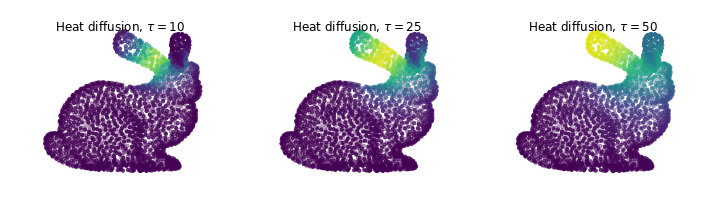

In [12]:
fig = plt.figure(figsize=(10, 3))
for i in range(g.Nf):
    ax = fig.add_subplot(1, g.Nf, i+1, projection='3d')
    G.plot_signal(s[:, i], colorbar=False, ax=ax)
    title = r'Heat diffusion, $\tau={}$'.format(taus[i])
    _ = ax.set_title(title)
    ax.set_axis_off()
fig.tight_layout()

# Visualizing wavelets atoms

In [13]:
g = filters.MexicanHat(G, Nf=6)  # Nf = 6 filters in the filter bank.

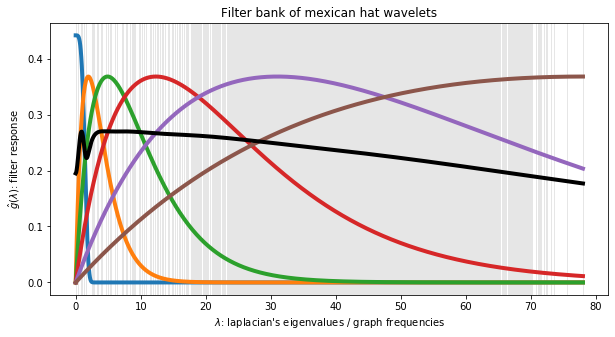

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
g.plot(ax=ax)
_ = ax.set_title('Filter bank of mexican hat wavelets')

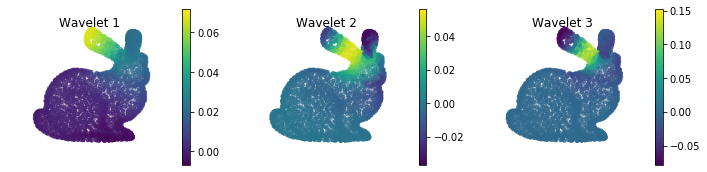

In [15]:
s = g.localize(DELTA)

fig = plt.figure(figsize=(10, 2.5))
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    G.plot_signal(s[:, i], ax=ax)
    _ = ax.set_title('Wavelet {}'.format(i+1))
    ax.set_axis_off()
fig.tight_layout()

## Curvature estimation

In [16]:
s = G.coords
s = g.filter(s)

In [17]:
s = np.linalg.norm(s, ord=2, axis=1)

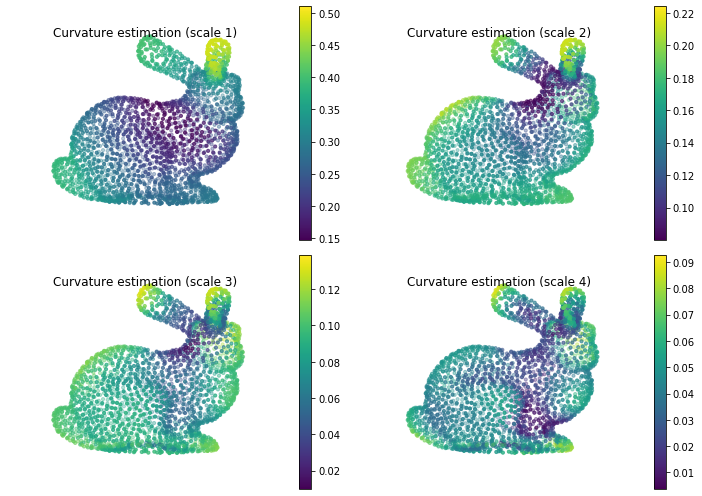

In [18]:
fig = plt.figure(figsize=(10, 7))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    G.plot_signal(s[:, i], ax=ax)
    title = 'Curvature estimation (scale {})'.format(i+1)
    _ = ax.set_title(title)
    ax.set_axis_off()
fig.tight_layout()